In [20]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter('ignore')

In [21]:
equity = "AXISBANK.BO"  # AXIS Bank
start_date = "2013-07-09"
end_date = "2023-07-09"
equity_data = yf.download(equity, start=start_date, end=end_date, progress=False)

In [22]:
equity_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2451 entries, 2013-07-09 to 2023-07-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2451 non-null   float64
 1   High       2451 non-null   float64
 2   Low        2451 non-null   float64
 3   Close      2451 non-null   float64
 4   Adj Close  2451 non-null   float64
 5   Volume     2451 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 134.0 KB


In [23]:
equity_data.head(10)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-07-09  252.600006  255.399994  252.009995  252.809998  235.313477   
2013-07-10  254.000000  256.290009  250.000000  251.350006  233.954514   
2013-07-11  257.000000  259.799988  256.000000  258.010010  240.153595   
2013-07-12  259.000000  259.720001  252.119995  257.959991  240.107040   
2013-07-15  258.200012  262.959991  256.399994  261.880005  243.755768   
2013-07-16  254.779999  254.779999  245.369995  246.309998  229.263321   
2013-07-17  247.399994  247.539993  235.449997  238.550003  222.040375   
2013-07-18  241.800003  249.399994  231.399994  247.679993  230.538498   
2013-07-19  250.779999  250.779999  237.000000  238.149994  221.668076   
2013-07-22  239.779999  242.339996  236.520004  240.050003  223.436569   

             Volume  
Date                 
2013-07-09   372500  
2013-07-10   414050  
2013-07-11   551315  
2013-07-12   274615  
2013-07-15   591460  
2013-07-16   869940  
2013-07-17  1311750  
2013-07-18  3474475  
2013-07-19  1702200  
2013-07-22   567895

In [24]:
equity_data.describe()

Open         High          Low        Close    Adj Close  \
count  2451.000000  2451.000000  2451.000000  2451.000000  2451.000000   
mean    576.477291   583.726467   568.197699   575.801995   572.135195   
std     173.318409   174.265252   172.003083   173.269594   176.749953   
min     156.539993   163.320007   152.800003   156.529999   145.696838   
25%     469.425003   475.000000   462.225006   468.850006   464.800537   
50%     555.000000   564.000000   547.250000   554.349976   548.814758   
75%     722.000000   732.875000   712.475006   721.674988   720.802979   
max     986.400024   989.900024   977.500000   987.799988   987.799988   

             Volume  
count  2.451000e+03  
mean   8.189268e+05  
std    5.485101e+06  
min    4.124200e+04  
25%    2.389745e+05  
50%    4.399680e+05  
75%    7.773900e+05  
max    2.634132e+08

###KELTNER CHANNEL:

The Keltner Channel is a technical analysis indicator that consists of an exponential moving average (EMA) and two bands, an upper band and a lower band. The bands are calculated by adding and subtracting a multiple of the average true range (ATR) from the EMA. This function takes in a DataFrame containing the necessary data columns ('Close', 'High', 'Low'), and calculates the Keltner Channel bands using the specified parameters.The Exponential Moving Average (EMA) is calculated using the 'Close' column with the specified EMA period.

The Average True Range (ATR) is calculated using the 'High', 'Low', and 'Close' columns. The high-low range and the absolute differences between the high and the previous close, and the low and the previous close are computed. The maximum of these values is taken as the true range, and the ATR is calculated by taking the rolling mean of the true range over the specified ATR period.

The upper and lower bands of the Keltner Channel are calculated by adding and subtracting a multiple of the ATR from the EMA. The function returns the EMA values, as well as the upper and lower Keltner Channel band values as Series.





In [25]:
def calculate_keltner_channel_bands(data, ema_period=20, atr_period=10, multiplier=2):

    # Exponential Moving Average (EMA)
    ema = data['Close'].ewm(span=ema_period, adjust=False).mean()

    #Average True Range (ATR)
    high_low = data['High'] - data['Low']
    high_close = np.abs(data['High'] - data['Close'].shift())
    low_close = np.abs(data['Low'] - data['Close'].shift())
    true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    atr = true_range.rolling(atr_period).mean()

    #Keltner Channel
    upper_band = ema + (multiplier * atr)
    lower_band = ema - (multiplier * atr)

    return ema, upper_band, lower_band


In [26]:
#Keltner Channel figure for each year
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

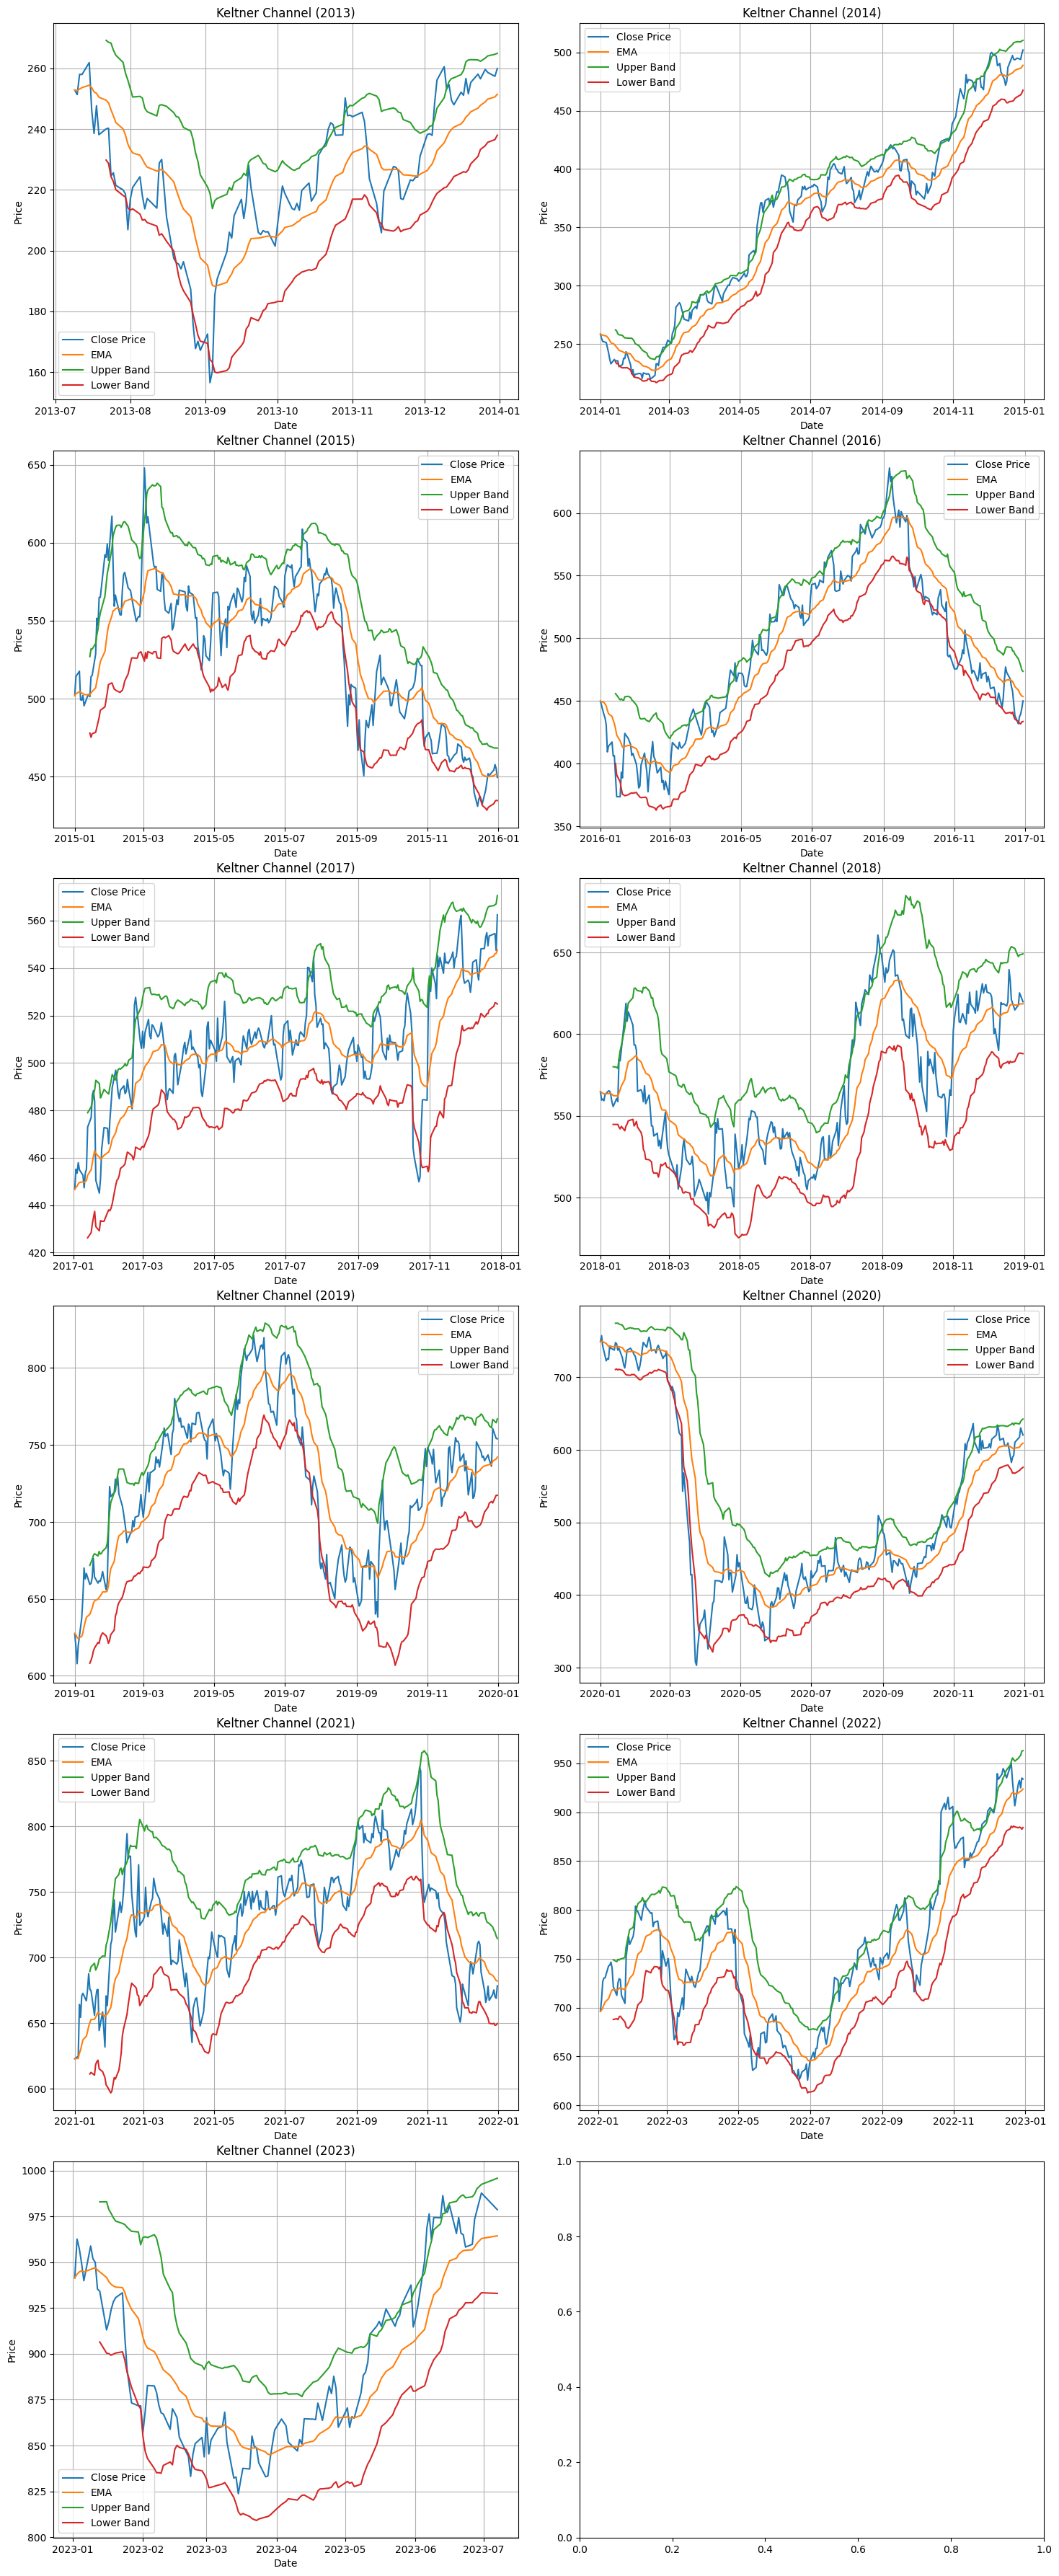

In [27]:
start_year = start_date.year
end_year = end_date.year
total_years = end_year - start_year + 1

# Calculate the number of rows and columns for the subplot grid
num_rows = (total_years + 1) // 2
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 6*num_rows))
fig.tight_layout(pad=3.0)

for i, year in enumerate(range(start_year, end_year + 1)):
    year_data = equity_data[str(year)]
    ema, upper_band, lower_band = calculate_keltner_channel_bands(year_data)

    # Calculate subplot position
    row = i // num_cols
    col = i % num_cols

    # Plotting
    axs[row, col].plot(year_data.index, year_data['Close'], label='Close Price')
    axs[row, col].plot(year_data.index, ema, label='EMA')
    axs[row, col].plot(year_data.index, upper_band, label='Upper Band')
    axs[row, col].plot(year_data.index, lower_band, label='Lower Band')
    axs[row, col].set_title('Keltner Channel ({0})'.format(year))
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel('Price')
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.show()

The graph graph can be explained as when the closing price consistently reaches or exceeds the upper band, it may suggest an overbought condition, indicating a potential reversal or correction. Conversely, when the closing price consistently falls below the lower band, it may indicate an oversold condition, signaling a potential bounce or upward move.

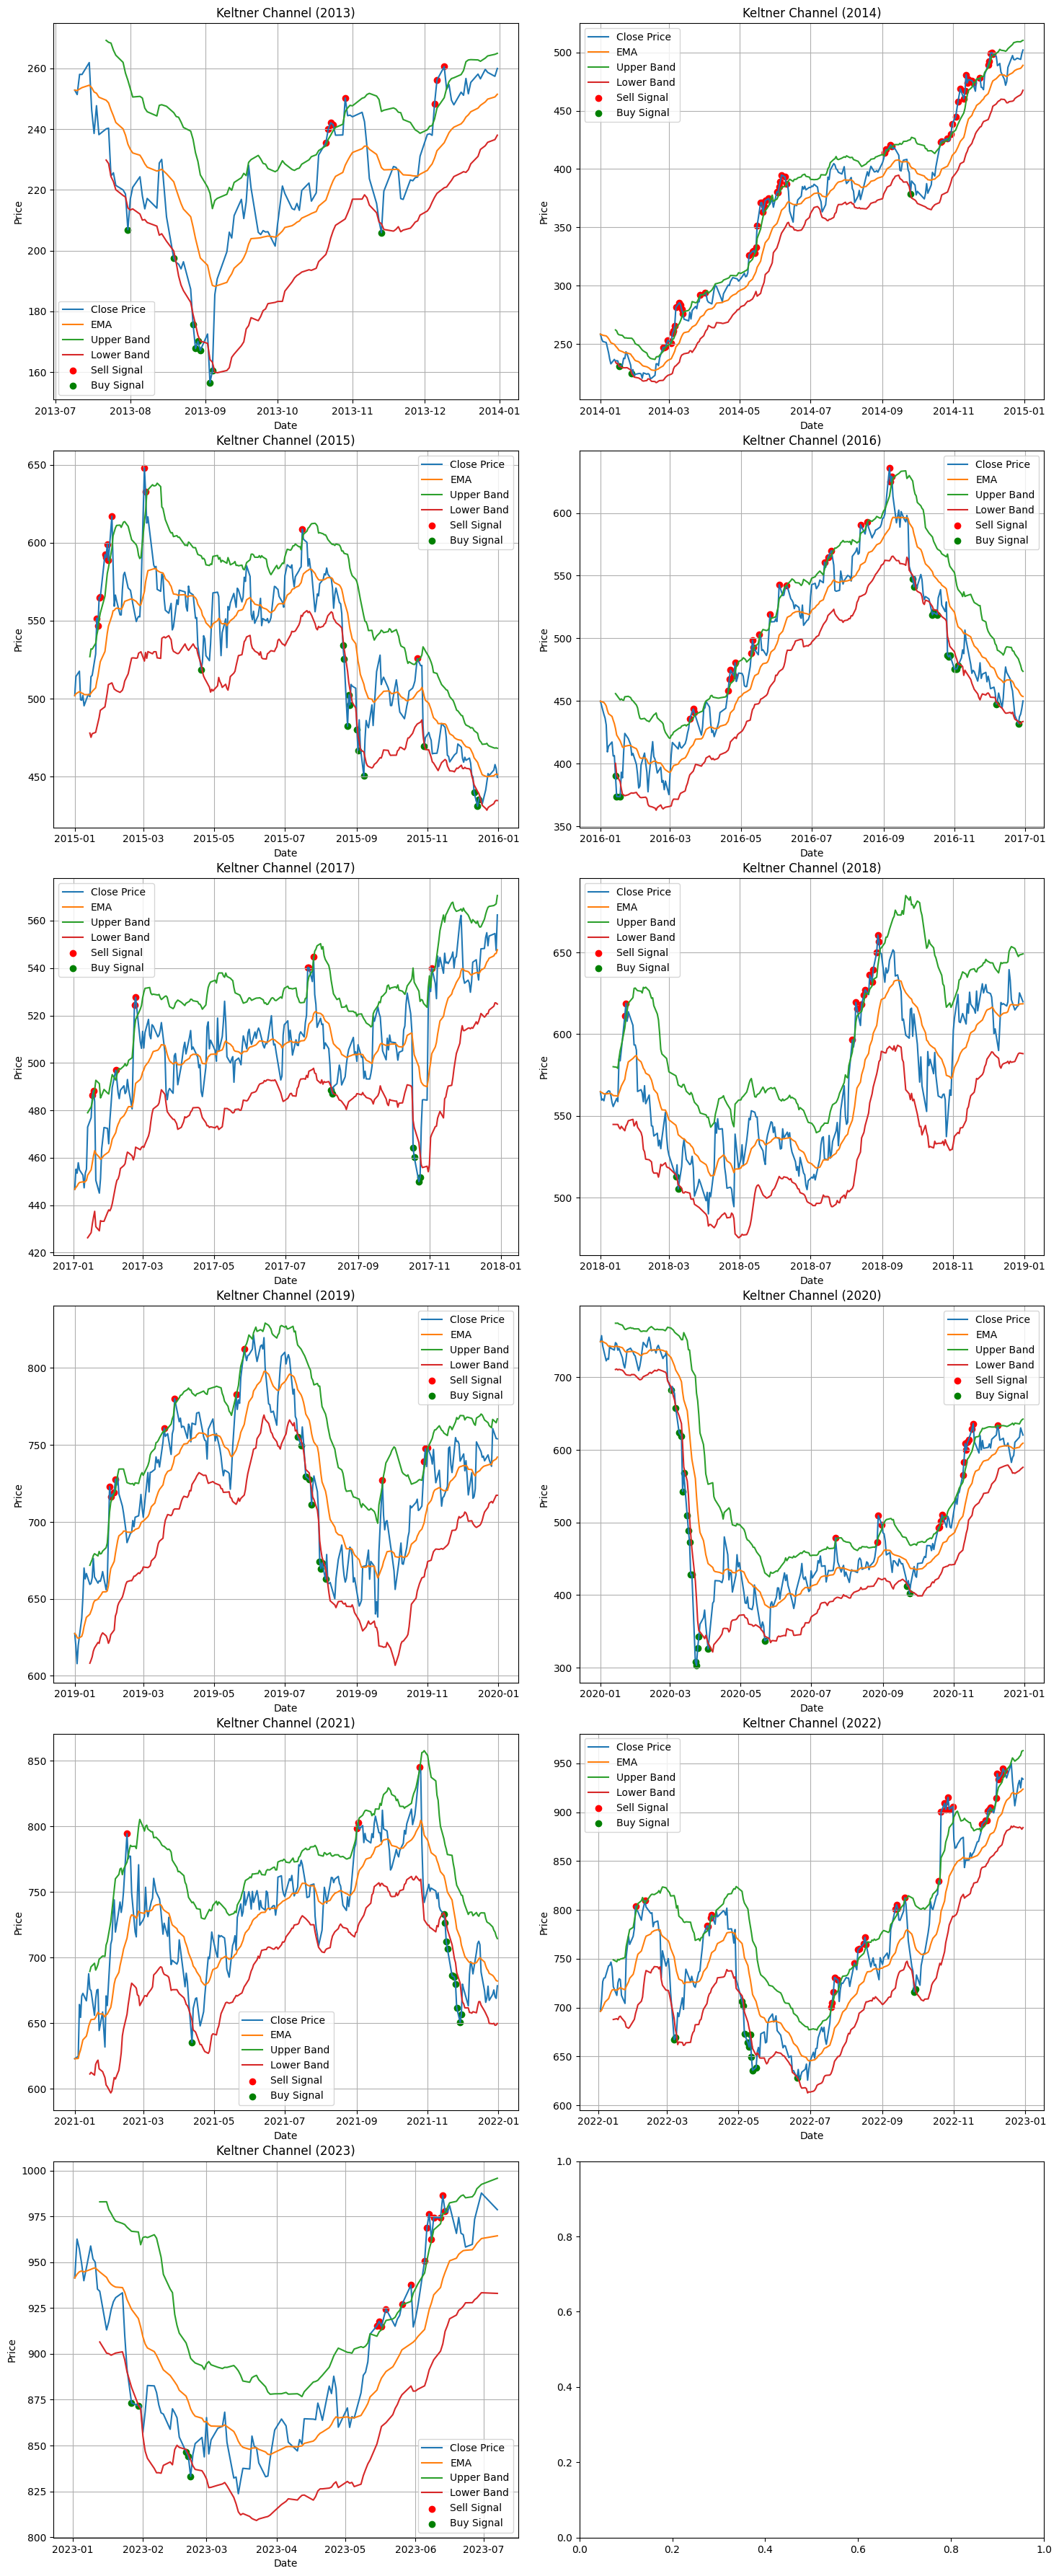

In [28]:
start_year = start_date.year
end_year = end_date.year
total_years = end_year - start_year + 1

# Calculate the number of rows and columns for the subplot grid
num_rows = (total_years + 1) // 2
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 6*num_rows))
fig.tight_layout(pad=3.0)

for i, year in enumerate(range(start_year, end_year + 1)):
    year_data = equity_data[str(year)]
    ema, upper_band, lower_band = calculate_keltner_channel_bands(year_data)

    # Here we are generating sell and buy signals
    sell_signals = year_data[year_data['Close'] > upper_band]['Close']
    buy_signals = year_data[year_data['Close'] < lower_band]['Close']

    # Calculate subplot position
    row = i // num_cols
    col = i % num_cols

    # Plotting
    axs[row, col].plot(year_data.index, year_data['Close'], label='Close Price')
    axs[row, col].plot(year_data.index, ema, label='EMA')
    axs[row, col].plot(year_data.index, upper_band, label='Upper Band')
    axs[row, col].plot(year_data.index, lower_band, label='Lower Band')
    axs[row, col].scatter(sell_signals.index, sell_signals, color='red', label='Sell Signal', marker='o')
    axs[row, col].scatter(buy_signals.index, buy_signals, color='green', label='Buy Signal', marker='o')
    axs[row, col].set_title('Keltner Channel ({0})'.format(year))
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel('Price')
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.show()

### Trading Strategy:
* If the price is below the lower line of the Keltner Channel, it indicates a potential buying opportunity.
* If the price is above the upper line of the Keltner Channel, it suggests a potential selling opportunity.

In [29]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [30]:
start_year = start_date.year
end_year = end_date.year
total_years = end_year - start_year + 1

# Calculate the number of rows and columns for the subplot grid
num_rows = (total_years + 1) // 2
num_cols = 2

for i, year in enumerate(range(start_year, end_year + 1)):
    year_data = equity_data[str(year)]

    # Preparing data for candlestick plot
    candlestick = go.Candlestick(
        x=year_data.index,
        open=year_data['Open'],
        high=year_data['High'],
        low=year_data['Low'],
        close=year_data['Close']
    )

    # Calculate subplot position
    row = i // num_cols
    col = i % num_cols

    # Plotting
    layout = go.Layout(
        title='Candlestick Chart ({0})'.format(year),
        xaxis=dict(title='Date'),
        yaxis=dict(title='Price'),
        showlegend=False
    )
    fig = go.Figure(data=[candlestick], layout=layout)
    fig.update_layout(height=400, width=1500)  # Set the desired chart size
    fig.show()

In [31]:
for year in range(start_date.year, end_date.year + 1):
    year_data = equity_data[str(year)]
    ema, upper_band, lower_band = calculate_keltner_channel_bands(year_data)

    # Here we are preparing data for candlestick plot
    candlestick = go.Candlestick(
        x=year_data.index,
        open=year_data['Open'],
        high=year_data['High'],
        low=year_data['Low'],
        close=year_data['Close']
    )

    #Here we are plotting
    fig = go.Figure()

    # Here we are adding candlestick trace
    fig.add_trace(candlestick)

    # Here we are adding Keltner Channel lines
    fig.add_trace(go.Scatter(
        x=year_data.index, y=ema,
        mode='lines',
        name='EMA',
        line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=year_data.index, y=upper_band,
        mode='lines',
        name='Upper Band',
        line=dict(color='orange')
    ))
    fig.add_trace(go.Scatter(
        x=year_data.index, y=lower_band,
        mode='lines',
        name='Lower Band',
        line=dict(color='orange')
    ))

    # Here we are setting layout
    fig.update_layout(
        title='Keltner Channel and Candlestick Chart ({0})'.format(year),
        xaxis=dict(title='Date'),
        yaxis=dict(title='Price')
    )

    # Show the combined plot
    fig.show()

In [32]:
start_date = pd.to_datetime("2013-07-05")
end_date = pd.to_datetime("2023-07-05")

for year in range(start_date.year, end_date.year + 1):
    year_data = equity_data[str(year)]
    ema, upper_band, lower_band = calculate_keltner_channel_bands(year_data)

    # Here we are preparing data for candlestick plot
    candlestick = go.Candlestick(
        x=year_data.index,
        open=year_data['Open'],
        high=year_data['High'],
        low=year_data['Low'],
        close=year_data['Close']
    )

    # Here we are plotting
    fig = go.Figure()

    # Here we are adding candlestick trace
    fig.add_trace(candlestick)

    # Here we are adding Keltner Channel lines
    fig.add_trace(go.Scatter(
        x=year_data.index, y=ema,
        mode='lines',
        name='EMA',
        line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=year_data.index, y=upper_band,
        mode='lines',
        name='Upper Band',
        line=dict(color='orange')
    ))
    fig.add_trace(go.Scatter(
        x=year_data.index, y=lower_band,
        mode='lines',
        name='Lower Band',
        line=dict(color='orange')
    ))

    # Here we are finding hammer candlestick pattern
    hammer_pattern = year_data[(year_data['Low'] - year_data['Open']) > 2 * (year_data['Close'] - year_data['Open'])]

    # Here we are generating buy and sell signals
    buy_signals = hammer_pattern['High'] + 0.01
    sell_signals = hammer_pattern['Low'] - 0.01

    # Here we are plotting buy signals
    fig.add_trace(go.Scatter(
        x=hammer_pattern.index,
        y=buy_signals,
        mode='markers',
        marker=dict(symbol="cross", color="green"),
        name='Buy Signals'
    ))

    # Here we are plotting sell signals
    fig.add_trace(go.Scatter(
        x=hammer_pattern.index,
        y=sell_signals,
        mode='markers',
        marker=dict(symbol="cross", color="red"),
        name='Sell Signals'
    ))

    # Here we are setting layout
    fig.update_layout(
        title='Keltner Channel and Candlestick Chart ({0})'.format(year),
        xaxis=dict(title='Date'),
        yaxis=dict(title='Price'),
        showlegend=True
    )

    fig.show()

### Finding relevant statistics for the strategy:

In [33]:
cumulative_returns = []
max_drawdowns = []
sharpe_ratios = []

In [34]:
#Returns, Drawdown, and Sharpe Ratio
returns = (hammer_pattern['Close'].pct_change() + 1).cumprod()
cumulative_returns.append(returns[-1] - 1)

# Drawdown
equity_curve = returns.cumprod()
previous_peaks = equity_curve.cummax()
drawdowns = (equity_curve - previous_peaks) / previous_peaks
max_drawdowns.append(drawdowns.max())

# Sharpe Ratio
daily_returns = hammer_pattern['Close'].pct_change()
sharpe_ratio = (daily_returns.mean() / daily_returns.std()) * np.sqrt(252)
sharpe_ratios.append(sharpe_ratio)

In [35]:
mean_cumulative_returns = np.mean(cumulative_returns)
mean_max_drawdowns = np.mean(max_drawdowns)
mean_sharpe_ratios = np.mean(sharpe_ratios)

In [36]:
print("Mean Cumulative Returns: ", mean_cumulative_returns)
print("Mean Maximum Drawdowns: ", mean_max_drawdowns)
print("Mean Sharpe Ratios: ", mean_sharpe_ratios)

Mean Cumulative Returns:  0.008825935822433406
Mean Maximum Drawdowns:  0.0
Mean Sharpe Ratios:  0.3449254647884959
